In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/digit_recognition/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
y = df['label']
X = df.drop('label',axis=1)

In [5]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


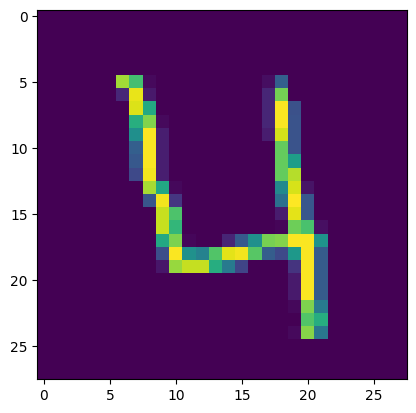

In [6]:
A = X.iloc[3].values.reshape(28,28)
plt.imshow(A)

In [7]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
X.shape

(42000, 784)

In [9]:
# Scale
X_train = X/255

In [10]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [11]:
from tensorflow.keras.utils import to_categorical

In [13]:
ya = to_categorical(y,num_classes=10)

In [14]:
ya[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(16,activation='relu', input_shape=(784,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax')) # softmax gives output in probability format

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,ya,epochs=30,batch_size=64)

Epoch 1/30
657/657 [==============================] - 3s 3ms/step - loss: 0.6190 - accuracy: 0.8288
Epoch 2/30
657/657 [==============================] - 2s 3ms/step - loss: 0.2747 - accuracy: 0.9210
Epoch 3/30
657/657 [==============================] - 2s 3ms/step - loss: 0.2358 - accuracy: 0.9315
Epoch 4/30
657/657 [==============================] - 2s 3ms/step - loss: 0.2124 - accuracy: 0.9374
Epoch 5/30
657/657 [==============================] - 2s 3ms/step - loss: 0.1969 - accuracy: 0.9421
Epoch 6/30
657/657 [==============================] - 2s 3ms/step - loss: 0.1856 - accuracy: 0.9459
Epoch 7/30
657/657 [==============================] - 2s 3ms/step - loss: 0.1758 - accuracy: 0.9483
Epoch 8/30
657/657 [==============================] - 2s 3ms/step - loss: 0.1684 - accuracy: 0.9503
Epoch 9/30
657/657 [==============================] - 2s 3ms/step - loss: 0.1621 - accuracy: 0.9519
Epoch 10/30
657/657 [==============================] - 2s 3ms/step - loss: 0.1558 - accuracy: 0.9542

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.evaluate(X_train,ya)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9740


[0.08750543743371964, 0.9740476012229919]

# Make Predictions

In [32]:
A = X_train.iloc[41999].values.reshape(1,784)
model.predict_on_batch(A).argmax()

9

In [27]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

# Predictions on real data

In [39]:
# Create your own handwriting in Paint
# Read as numpy array
import cv2 
def get_digit(path):
    A = cv2.imread(path, 0) # gray=0
    A = cv2.resize(A,(28,28))
    A = A/255
    A = A.reshape(1,784)
    return model.predict_on_batch(A).argmax()

In [40]:
import os

In [43]:
for img in os.listdir('../../datasets/digit_recognition/my_images/'):
    print('../../datasets/digit_recognition/my_images/'+img)

../../datasets/digit_recognition/my_images/0.jpg
../../datasets/digit_recognition/my_images/00.jpg
../../datasets/digit_recognition/my_images/1.jpg
../../datasets/digit_recognition/my_images/11.jpg
../../datasets/digit_recognition/my_images/2.jpg
../../datasets/digit_recognition/my_images/22.jpg
../../datasets/digit_recognition/my_images/3.jpg
../../datasets/digit_recognition/my_images/33.jpg
../../datasets/digit_recognition/my_images/4.jpg
../../datasets/digit_recognition/my_images/44.jpg
../../datasets/digit_recognition/my_images/5.jpg
../../datasets/digit_recognition/my_images/55.jpg
../../datasets/digit_recognition/my_images/6.jpg
../../datasets/digit_recognition/my_images/66.jpg
../../datasets/digit_recognition/my_images/7.jpg
../../datasets/digit_recognition/my_images/77.jpg
../../datasets/digit_recognition/my_images/8.jpg
../../datasets/digit_recognition/my_images/88.jpg
../../datasets/digit_recognition/my_images/9.jpg
../../datasets/digit_recognition/my_images/99.jpg


In [45]:
for img in os.listdir('../../datasets/digit_recognition/my_images/'):
    y = get_digit('../../datasets/digit_recognition/my_images/'+img)
    print(img,'\t',y)

0.jpg 	 4
00.jpg 	 0
1.jpg 	 5
11.jpg 	 5
2.jpg 	 6
22.jpg 	 2
3.jpg 	 2
33.jpg 	 3
4.jpg 	 8
44.jpg 	 6
5.jpg 	 3
55.jpg 	 5
6.jpg 	 0
66.jpg 	 6
7.jpg 	 2
77.jpg 	 3
8.jpg 	 8
88.jpg 	 5
9.jpg 	 3
99.jpg 	 3
